In [1]:
import pandas as pd
import numpy as np
import gzip


In [2]:
APID_file = '/Users/vandanareddy/Downloads/APID.txt'
macro_file = '/Users/vandanareddy/Downloads/cell_type_category_rna_Macrophages_Cell.tsv'
uniprot_file = '/Users/vandanareddy/Downloads/uniprot-homo+sapiens.tab.gz'

In [3]:
APID_df = pd.read_table(APID_file)
uniprot_df = pd.read_table(uniprot_file)
macro_df = pd.read_table(macro_file)

/Users/vandanareddy/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
APID_df.head()

,InteractionID,UniprotID_A,UniprotName_A,GeneName_A,UniprotID_B,UniprotName_B,GeneName_B,ExpEvidences,Methods,Publications,3DStructures,CurationEvents
0,1495672,A0A024R0Y4,A0A024R0Y4_HUMAN,TADA2A,Q8WWY3,PRP31_HUMAN,PRPF31,1,3,1,0,3
1,1591599,A0A024R4B0,A0A024R4B0_HUMAN,SPATA3,O15354,GPR37_HUMAN,GPR37,1,3,1,0,3
2,1532709,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT,Q96D03,DDT4L_HUMAN,DDIT4L,1,2,1,0,4
3,1532710,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT,P51911,CNN1_HUMAN,CNN1,1,2,1,0,4
4,1714250,A0A024R6G0,A0A024R6G0_HUMAN,TCL6,P50222,MEOX2_HUMAN,MEOX2,1,3,1,0,3


In [5]:
uniprot_df.head()

,Entry,Entry name,Gene names,Organism,Protein names,Pathway,Gene ontology (GO),Subcellular location [CC],Status
0,Q53XC5,Q53XC5_HUMAN,BMP4 hCG_20967,Homo sapiens (Human),Bone morphogenetic protein 4 (Bone morphogenet...,NaN,extracellular space [GO:0005615]; growth facto...,NaN,unreviewed
1,A8K571,A8K571_HUMAN,BMP7 hCG_40100,Homo sapiens (Human),Bone morphogenetic protein 7 (Osteogenic prote...,NaN,collagen-containing extracellular matrix [GO:0...,NaN,unreviewed
2,A8K660,A8K660_HUMAN,ADIPOQ hCG_1784052,Homo sapiens (Human),"Adiponectin (Adiponectin, C1Q and collagen dom...",NaN,collagen trimer [GO:0005581]; endoplasmic reti...,NaN,unreviewed
3,Q5U0J5,Q5U0J5_HUMAN,CREB1 hCG_15208,Homo sapiens (Human),cAMP responsive element binding protein 1 (cAM...,NaN,ATF4-CREB1 transcription factor complex [GO:19...,SUBCELLULAR LOCATION: Nucleus {ECO:0000256|ARB...,unreviewed
4,Q5TCX1,Q5TCX1_HUMAN,TREM2,Homo sapiens (Human),Triggering receptor expressed on myeloid cells...,NaN,integral component of plasma membrane [GO:0005...,NaN,unreviewed


In [6]:
protA_merge = pd.merge(APID_df, uniprot_df, how="inner", left_on="UniprotID_A", right_on="Entry")
protA_merge

,InteractionID,UniprotID_A,UniprotName_A,GeneName_A,UniprotID_B,UniprotName_B,GeneName_B,ExpEvidences,Methods,Publications,...,CurationEvents,Entry,Entry name,Gene names,Organism,Protein names,Pathway,Gene ontology (GO),Subcellular location [CC],Status
0,1495672,A0A024R0Y4,A0A024R0Y4_HUMAN,TADA2A,Q8WWY3,PRP31_HUMAN,PRPF31,1,3,1,...,3,A0A024R0Y4,A0A024R0Y4_HUMAN,TADA2A TADA2L hCG_28187,Homo sapiens (Human),Transcriptional adapter,NaN,Ada2/Gcn5/Ada3 transcription activator complex...,SUBCELLULAR LOCATION: Nucleus {ECO:0000256|PIR...,unreviewed
1,1591599,A0A024R4B0,A0A024R4B0_HUMAN,SPATA3,O15354,GPR37_HUMAN,GPR37,1,3,1,...,3,A0A024R4B0,A0A024R4B0_HUMAN,SPATA3 hCG_34339,Homo sapiens (Human),"Spermatogenesis associated 3, isoform CRA_b",NaN,NaN,NaN,unreviewed
2,1532709,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT,Q96D03,DDT4L_HUMAN,DDIT4L,1,2,1,...,4,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT hCG_20946,Homo sapiens (Human),TCF3 (E2A) fusion partner (In childhood Leukem...,NaN,nucleoplasm [GO:0005654]; apoptotic process [G...,NaN,unreviewed
3,1532710,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT,P51911,CNN1_HUMAN,CNN1,1,2,1,...,4,A0A024R4Q5,A0A024R4Q5_HUMAN,TFPT hCG_20946,Homo sapiens (Human),TCF3 (E2A) fusion partner (In childhood Leukem...,NaN,nucleoplasm [GO:0005654]; apoptotic process [G...,NaN,unreviewed
4,1714250,A0A024R6G0,A0A024R6G0_HUMAN,TCL6,P50222,MEOX2_HUMAN,MEOX2,1,3,1,...,3,A0A024R6G0,A0A024R6G0_HUMAN,TCL6 hCG_22871,Homo sapiens (Human),"T-cell leukemia/lymphoma 6, isoform CRA_b",NaN,NaN,NaN,unreviewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146346,1205512,P69700,VPU_HV1H3,vpu,Q9Y297,FBW1A_HUMAN,BTRC,3,3,1,...,3,P69700,VPU_HV1H3,vpu,Human immunodeficiency virus type 1 group M su...,Protein Vpu (U ORF protein) (Viral protein U),NaN,host cell membrane [GO:0033644]; integral comp...,SUBCELLULAR LOCATION: Host membrane {ECO:00002...,reviewed
146347,1205514,O09528,O09528_9HIV1,vpu,Q9Y297,FBW1A_HUMAN,BTRC,1,1,1,...,1,O09528,O09528_9HIV1,vpu,Human immunodeficiency virus 1,Protein Vpu (U ORF protein) (Viral protein U),NaN,host cell membrane [GO:0033644]; integral comp...,SUBCELLULAR LOCATION: Host membrane {ECO:00002...,unreviewed
146348,1419121,P05928,VPR_HV1BR,vpr,Q9Y4B6,DCAF1_HUMAN,DCAF1,3,3,2,...,7,P05928,VPR_HV1BR,vpr,Human immunodeficiency virus type 1 group M su...,Protein Vpr (R ORF protein) (Viral protein R),NaN,host cell nucleus [GO:0042025]; host extracell...,SUBCELLULAR LOCATION: Virion {ECO:0000255|HAMA...,reviewed
146349,1400551,Q8V2D1,Q8V2D1_HCMV,NaN,Q9Y4K3,TRAF6_HUMAN,TRAF6,3,3,1,...,3,Q8V2D1,Q8V2D1_HCMV,NaN,Human cytomegalovirus (HHV-5) (Human herpesvir...,UL144 protein,NaN,integral component of membrane [GO:0016021],NaN,unreviewed


In [7]:
merge_df = pd.merge(protA_merge, uniprot_df, how="inner", left_on="UniprotID_B", right_on="Entry", suffixes=("_A", "_B"))
merge_df

,InteractionID,UniprotID_A,UniprotName_A,GeneName_A,UniprotID_B,UniprotName_B,GeneName_B,ExpEvidences,Methods,Publications,...,Status_A,Entry_B,Entry name_B,Gene names_B,Organism_B,Protein names_B,Pathway_B,Gene ontology (GO)_B,Subcellular location [CC]_B,Status_B
0,1495672,A0A024R0Y4,A0A024R0Y4_HUMAN,TADA2A,Q8WWY3,PRP31_HUMAN,PRPF31,1,3,1,...,unreviewed,Q8WWY3,PRP31_HUMAN,PRPF31 PRP31,Homo sapiens (Human),U4/U6 small nuclear ribonucleoprotein Prp31 (P...,NaN,Cajal body [GO:0015030]; MLL1 complex [GO:0071...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
1,1675028,A1L4K1,FSD2_HUMAN,FSD2,Q8WWY3,PRP31_HUMAN,PRPF31,1,1,1,...,reviewed,Q8WWY3,PRP31_HUMAN,PRPF31 PRP31,Homo sapiens (Human),U4/U6 small nuclear ribonucleoprotein Prp31 (P...,NaN,Cajal body [GO:0015030]; MLL1 complex [GO:0071...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
2,1694417,A6NEM1,GG6L9_HUMAN,GOLGA6L9,Q8WWY3,PRP31_HUMAN,PRPF31,1,1,1,...,reviewed,Q8WWY3,PRP31_HUMAN,PRPF31 PRP31,Homo sapiens (Human),U4/U6 small nuclear ribonucleoprotein Prp31 (P...,NaN,Cajal body [GO:0015030]; MLL1 complex [GO:0071...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
3,1677191,A8MQ03,CRTP1_HUMAN,CYSRT1,Q8WWY3,PRP31_HUMAN,PRPF31,1,1,1,...,reviewed,Q8WWY3,PRP31_HUMAN,PRPF31 PRP31,Homo sapiens (Human),U4/U6 small nuclear ribonucleoprotein Prp31 (P...,NaN,Cajal body [GO:0015030]; MLL1 complex [GO:0071...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
4,1532683,O14641,DVL2_HUMAN,DVL2,Q8WWY3,PRP31_HUMAN,PRPF31,1,3,1,...,reviewed,Q8WWY3,PRP31_HUMAN,PRPF31 PRP31,Homo sapiens (Human),U4/U6 small nuclear ribonucleoprotein Prp31 (P...,NaN,Cajal body [GO:0015030]; MLL1 complex [GO:0071...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139730,1378134,P0C706,CVC2_EBVG,CVC2,Q6FH22,Q6FH22_HUMAN,EFEMP2,1,1,1,...,reviewed,Q6FH22,Q6FH22_HUMAN,EFEMP2,Homo sapiens (Human),EFEMP2 protein,NaN,extracellular space [GO:0005615]; calcium ion ...,NaN,unreviewed
139731,1378183,Q3KSU1,ICP27_EBVG,BSLF2,Q68DS7,Q68DS7_HUMAN,DKFZp686E07254,1,1,1,...,reviewed,Q68DS7,Q68DS7_HUMAN,DKFZp686E07254,Homo sapiens (Human),Uncharacterized protein DKFZp686E07254 (Fragment),NaN,DNA binding [GO:0003677]; metal ion binding [G...,NaN,unreviewed
139732,1396956,Q2I360,Q2I360_HBV,C,Q6NW24,Q6NW24_HUMAN,PDCD2,1,1,1,...,unreviewed,Q6NW24,Q6NW24_HUMAN,PDCD2,Homo sapiens (Human),PDCD2 protein,NaN,NaN,NaN,unreviewed
139733,1378079,P0CK53,CEP2_EBVB9,BGLF2,Q8TF72,SHRM3_HUMAN,SHROOM3,1,1,1,...,reviewed,Q8TF72,SHRM3_HUMAN,SHROOM3 KIAA1481 SHRML MSTP013,Homo sapiens (Human),Protein Shroom3 (Shroom-related protein) (hShrmL),NaN,adherens junction [GO:0005912]; apical junctio...,"SUBCELLULAR LOCATION: Cell junction, adherens ...",reviewed


In [8]:
interaction_df = merge_df[(merge_df.UniprotID_A.isin(macro_df.Uniprot)) | (merge_df.UniprotID_B.isin(macro_df.Uniprot))]
nondupe_df = interaction_df.query("UniprotID_A != UniprotID_B")


In [9]:
nondupe_df

,InteractionID,UniprotID_A,UniprotName_A,GeneName_A,UniprotID_B,UniprotName_B,GeneName_B,ExpEvidences,Methods,Publications,...,Status_A,Entry_B,Entry name_B,Gene names_B,Organism_B,Protein names_B,Pathway_B,Gene ontology (GO)_B,Subcellular location [CC]_B,Status_B
9,1495411,O43586,PPIP1_HUMAN,PSTPIP1,Q8WWY3,PRP31_HUMAN,PRPF31,3,5,3,...,reviewed,Q8WWY3,PRP31_HUMAN,PRPF31 PRP31,Homo sapiens (Human),U4/U6 small nuclear ribonucleoprotein Prp31 (P...,NaN,Cajal body [GO:0015030]; MLL1 complex [GO:0071...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
146,1591593,Q02930,CREB5_HUMAN,CREB5,O15354,GPR37_HUMAN,GPR37,1,3,1,...,reviewed,O15354,GPR37_HUMAN,GPR37,Homo sapiens (Human),Prosaposin receptor GPR37 (Endothelin B recept...,NaN,cell surface [GO:0009986]; cytoplasm [GO:00057...,SUBCELLULAR LOCATION: Cell membrane {ECO:00002...,reviewed
245,2175074,P09917,LOX5_HUMAN,ALOX5,P50222,MEOX2_HUMAN,MEOX2,1,1,1,...,reviewed,P50222,MEOX2_HUMAN,MEOX2 GAX MOX2,Homo sapiens (Human),Homeobox protein MOX-2 (Growth arrest-specific...,NaN,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
345,1706672,Q8NF50,DOCK8_HUMAN,DOCK8,P50222,MEOX2_HUMAN,MEOX2,2,4,2,...,reviewed,P50222,MEOX2_HUMAN,MEOX2 GAX MOX2,Homo sapiens (Human),Homeobox protein MOX-2 (Growth arrest-specific...,NaN,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
389,1709225,Q9HBI0,PARVG_HUMAN,PARVG,P50222,MEOX2_HUMAN,MEOX2,2,4,2,...,reviewed,P50222,MEOX2_HUMAN,MEOX2 GAX MOX2,Homo sapiens (Human),Homeobox protein MOX-2 (Growth arrest-specific...,NaN,chromatin [GO:0000785]; cytoplasm [GO:0005737]...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...,reviewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139615,1216972,P24837,VE7_HPV39,E7,Q16831,UPP1_HUMAN,UPP1,1,1,1,...,reviewed,Q16831,UPP1_HUMAN,UPP1 UP,Homo sapiens (Human),Uridine phosphorylase 1 (UPase 1) (UrdPase 1) ...,PATHWAY: Pyrimidine metabolism; UMP biosynthes...,cytosol [GO:0005829]; nucleoplasm [GO:0005654]...,NaN,reviewed
139616,1216827,Q84292,VE7_HPV6A,E7,Q16831,UPP1_HUMAN,UPP1,1,1,1,...,reviewed,Q16831,UPP1_HUMAN,UPP1 UP,Homo sapiens (Human),Uridine phosphorylase 1 (UPase 1) (UrdPase 1) ...,PATHWAY: Pyrimidine metabolism; UMP biosynthes...,cytosol [GO:0005829]; nucleoplasm [GO:0005654]...,NaN,reviewed
139624,2171319,P0C6X7,R1AB_CVHSA,rep,Q8NEQ5,CA162_HUMAN,C1orf162,1,1,1,...,reviewed,Q8NEQ5,CA162_HUMAN,C1orf162,Homo sapiens (Human),Transmembrane protein C1orf162,NaN,integral component of membrane [GO:0016021],SUBCELLULAR LOCATION: Membrane {ECO:0000305}; ...,reviewed
139689,2108647,P03126,VE6_HPV16,E6,Q8WZ60,KLHL6_HUMAN,KLHL6,1,1,1,...,reviewed,Q8WZ60,KLHL6_HUMAN,KLHL6,Homo sapiens (Human),Kelch-like protein 6,NaN,B cell receptor signaling pathway [GO:0050853]...,NaN,reviewed


In [10]:
subset_df = nondupe_df[['UniprotID_A', 'UniprotID_B']]
subset_list = subset_df.to_records(index=False)
subset_list[1:5]

rec.array([('Q02930', 'O15354'), ('P09917', 'P50222'),
           ('Q8NF50', 'P50222'), ('Q9HBI0', 'P50222')],
          dtype=[('UniprotID_A', 'O'), ('UniprotID_B', 'O')])

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

In [12]:
G=nx.Graph(name="Macrophage Protein Proteins Interaction Network")
G.add_edges_from(subset_list)

In [13]:
nx.info(G)

"Graph named 'Macrophage Protein Proteins Interaction Network' with 3057 nodes and 4733 edges"

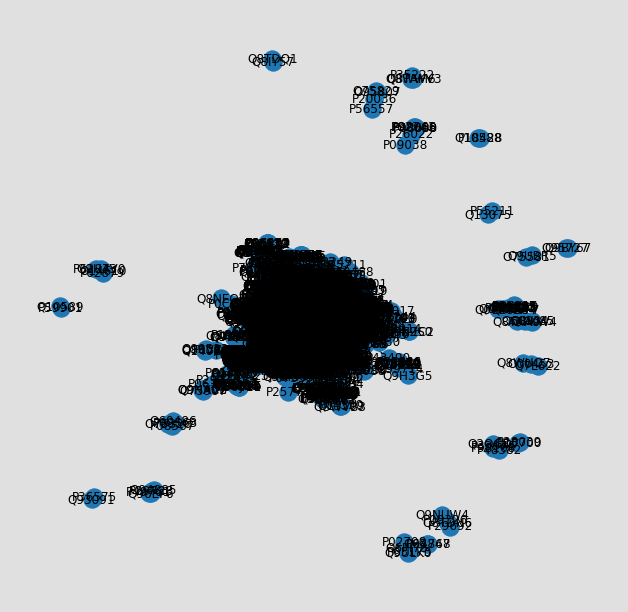

In [14]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

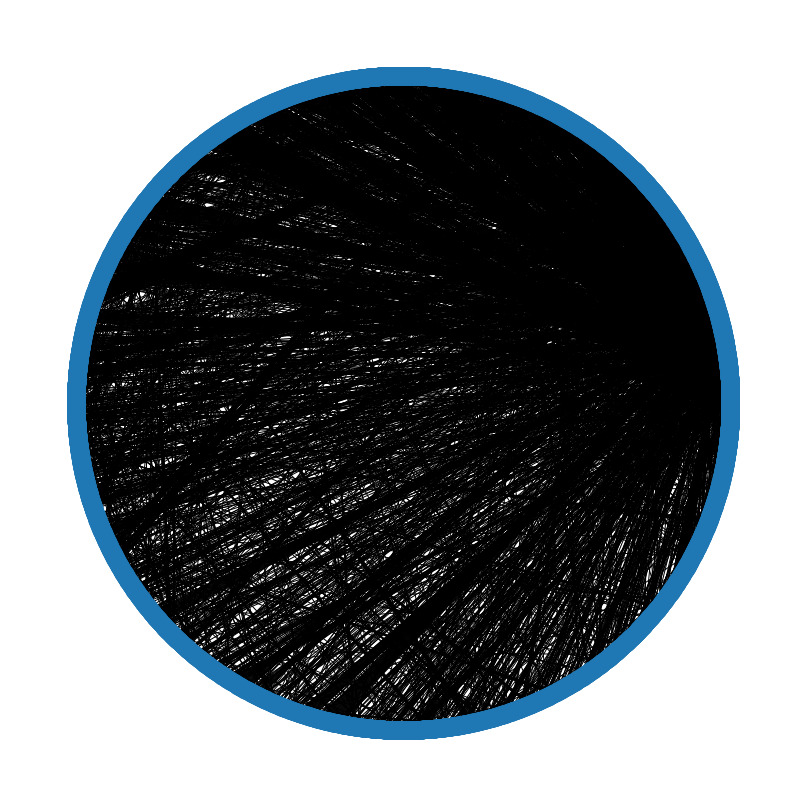

In [25]:
pos = nx.circular_layout(G)
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_circular(G)
plt.axis('off')
plt.show()

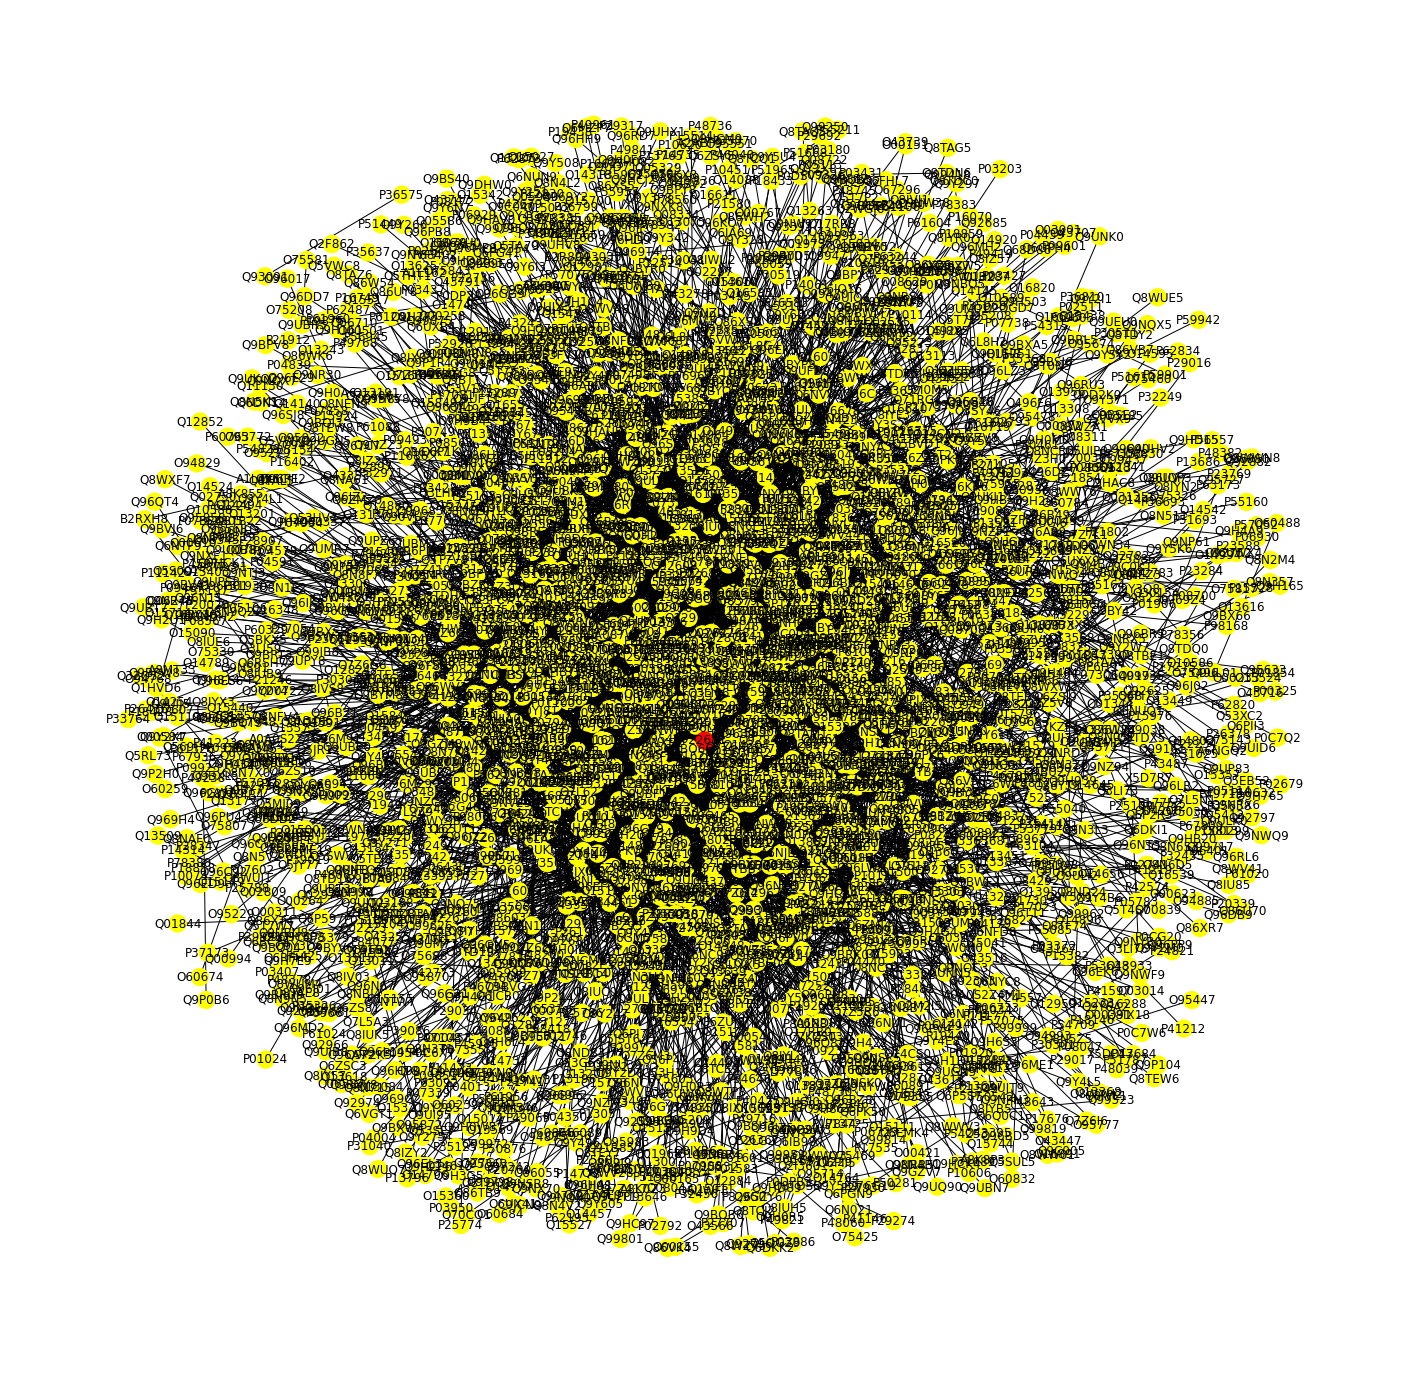

In [22]:
plt.figure(figsize=(25,25))
pos = nx.spring_layout(G, k = .15)
color = ['green' if node == "P22681" else "yellow" for node in G]
nx.draw_networkx(G, pos, node_color = color)
plt.axis('off')
plt.show()